In [75]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti

def mse(w,x,y):
	return (x@w - y)**2

def mse_grad(w,x,y):
	return 1/x.shape[0] * 2 * (x.T @ x @ w - x.T @ y)

def reglog(w,x,y):
	return np.mean(np.log(1 + np.exp(-y * (x @ w))))

def reglog_grad(w,x,y):
	return np.mean(1 / (1+np.exp(-y*(x@w))) * (-y*x) * np.exp(-y * (x@w)), axis=0).reshape(-1,1)

In [70]:
np.random.seed(0)
datax, datay = gen_arti(epsilon=0.1)
wrandom = np.random.randn(datax.shape[1],1)
assert(np.isclose(mse(wrandom,datax,datay).mean(),0.54731,rtol=1e-4))
assert(np.isclose(reglog(wrandom,datax,datay).mean(), 0.57053,rtol=1e-4))
assert(np.isclose(mse_grad(wrandom,datax,datay).mean(),-1.43120,rtol=1e-4))
assert(np.isclose(reglog_grad(wrandom,datax,datay).mean(),-0.42714,rtol=1e-4))
np.random.seed()

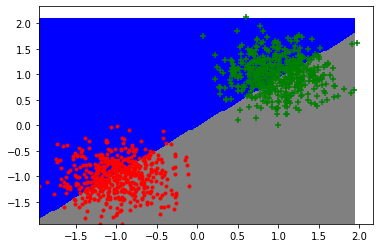

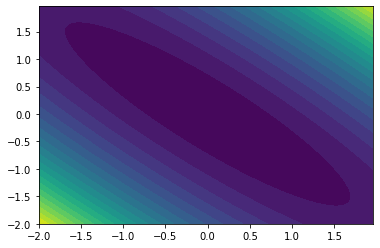

In [58]:
## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
datax, datay = gen_arti(epsilon=0.1)
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w  = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)

In [80]:
def descente_gradient(x, y, f_loss, f_grad, eps, n_iter):
	list_w = []
	list_l = []
	w = np.random.randn(datax.shape[1], 1)
	for _ in range(n_iter):
		w = w - eps * f_grad(w, x, y)
		list_w.append(w)
		list_l.append(f_loss(w, x, y))
	return list_w, list_l, w

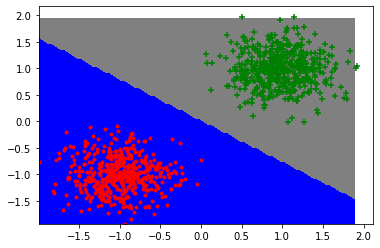

In [81]:
lw, ll, w = descente_gradient(datax, datay, reglog, reglog_grad, 1e-4, 100)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

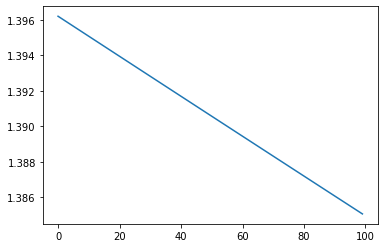

In [83]:
plt.plot(ll)
plt.show()

(2, 1)


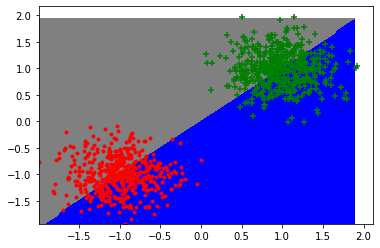

In [78]:
lw, ll, w = descente_gradient(datax, datay, mse, mse_grad, 1e-4, 100)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)